In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:\\Users\\Наташа\\Desktop\\машинное обучение\\ml2021l-main\\data\\mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


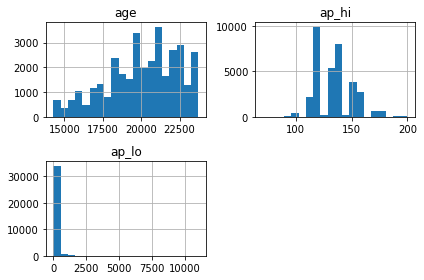

In [19]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

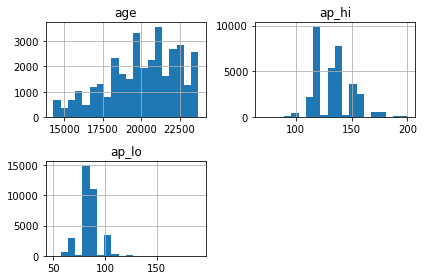

In [20]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "weight", "height", "ap_lo", "ap_hi"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

68703 0.7088482307905041


array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [27]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

train = data[["cholesterol", "gluc"]]
target = data["cardio"]

model = clf.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

68703 0.5919974382486937


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

train = data[["smoke", "alco", "active"]]
target = data["cardio"]

model = clf.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

68703 0.5176920949594632


array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

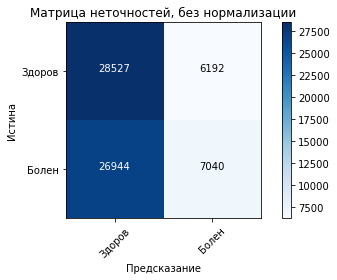

<Figure size 432x288 with 0 Axes>

In [29]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(target, predict)
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()
    plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

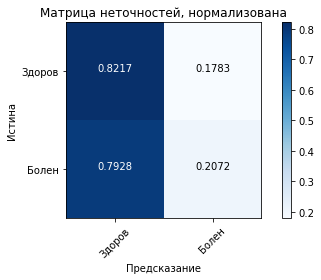

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()